# Source de donnée

# Preparation de donnée

In [ ]:
import requests
from bs4 import BeautifulSoup
import regex as re
import pandas as pd
import math

In [ ]:
dec_arret_url = 'https://www.courdecassation.fr/recherche-judilibre?search_api_fulltext=&date_du=2013-01-01&date_au=2023-01-01&judilibre_juridiction=cc&judilibre_type%5B0%5D=arret&op=Rechercher%20sur%20judilibre'
webpage = requests.get(dec_arret_url)
webpage.status_code

200

In [ ]:
soup = BeautifulSoup(webpage.content)

In [ ]:
decision_items = soup.find_all('div', class_='decision-item')

In [ ]:
for item in decision_items:
    date = item.find('h3', class_="inline-block").text
    date = date.split('-')[0].strip()

    chambre = item.find('p', class_="decision-item-header--secondary").text.strip()
    solution = item.find('p', class_="decision-item-header--secondary solution").text.strip()

    print(date, chambre, solution)

14 décembre 2022 Chambre commerciale financière et économique
              - Formation restreinte hors RNSM/NA Rabat
13 décembre 2022 Chambre criminelle
              - Formation restreinte hors RNSM/NA Autre
13 décembre 2022 Chambre criminelle
              - Formation restreinte hors RNSM/NA Rejet
13 décembre 2022 Chambre criminelle
              - Formation restreinte hors RNSM/NA Rejet
8 décembre 2022 Deuxième chambre civile
              - Formation restreinte hors RNSM/NA Rabat
8 décembre 2022 Deuxième chambre civile
              - Formation restreinte hors RNSM/NA Autre
7 décembre 2022 Chambre criminelle
              - Formation restreinte hors RNSM/NA Autre
30 novembre 2022 Première chambre civile
              - Formation restreinte hors RNSM/NA Autre
30 novembre 2022 Première chambre civile
              - Formation restreinte hors RNSM/NA Autre
30 novembre 2022 Chambre criminelle
              - Formation restreinte hors RNSM/NA Autre


In [ ]:
# data: une liste qui va regrouper les données decision par decision
data = []

print('# Scrapping des données de 2013 à 2023:')
for year in range(2013, 2023):
    # pour chaque année
    # on cherche le nombre de resultats/page trouvé
    url = f'https://www.courdecassation.fr/recherche-judilibre?search_api_fulltext=&date_du={year}-01-01&date_au={year}-12-31&judilibre_juridiction=cc&op=Rechercher%20sur%20judilibre&page=0'
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.content)
    results_nbr = int(soup.find('span', id='researchNbResults').text)
    results_pages = math.ceil((results_nbr/10))
    print(f'Année {year}: {results_nbr} resultats trouvé sur {results_pages} pages. Scrapping en cours ...')

    # i: variable qui va de 0 à 999 et qui correspond au numéro de page dans les resultats de recherche
    for i in range(0, results_pages):
        # url: lien vers la pages de resultats avec le numéro (i)
        url = f'https://www.courdecassation.fr/recherche-judilibre?search_api_fulltext=&date_du={year}-01-01&date_au={year}-12-31&judilibre_juridiction=cc&op=Rechercher%20sur%20judilibre&page={i}'

        # télécharger la page de resultats avec le numero (i)
        webpage = requests.get(url)

        # BeautifulSoup pour acceder au contenu de la page
        soup = BeautifulSoup(webpage.content)

        # les decisions trouvées dans la recherche 
        # peuvent etre selectionner en utilisant le tag 'div'
        # et la class 'decision-item'
        decision_items = soup.find_all('div', class_='decision-item')

        # pour chaque decision trouvée dans les resultats
        for item in decision_items:

            # date: la date trouvée dans l'element 'h3' et la classe "inline-block"
            date = item.find('h3', class_="inline-block").text

            # exemple: "29 novembre 2022 - Cour de cassation - Pourvoi n° 22-80.635"
            #            ^^^^^^^^^^^^^^^ - ...
            # on utilise split('-') pour découper la chaine de caracteres
            # [0] pour prendre la date
            # .strip() pour supprimer les caracteres blanc sur les cotés
            date = date.split('-')[0].strip()

            # chambre: le nom de la chambre trouvé dans l'element 'p' avec la classe "decision-item-header--secondary"
            chambre = item.find('p', class_="decision-item-header--secondary").text.strip()

            # solution: la solution qui correspon à cette decision
            solution = item.find('p', class_="decision-item-header--secondary solution").text.strip()

            # lien: le lien vers la page contenant plus d'infos sur cette decision
            button = item.find('p', class_="btn button btn--type-1 float-right lien-voir lien-voir-decision")
            lien = 'https://www.courdecassation.fr' + button.find('a').get('href')

            # on rajoute une ligne dans notre base de données
            # qui contient date, chambre et solution
            data.append({
                'date': date,
                'chambre': chambre,
                'solution': solution,
                'lien': lien
            })

            # data est une liste de dictionaires
            # chaque dictionaire correspond à une ligne de données {date, chambre, solution}
    print('Terminé')

# Scrapping des données de 2013 à 2023:
Année 2013: 8955 resultats trouvé sur 896 pages. Scrapping en cours ...
Terminé
Année 2014: 8845 resultats trouvé sur 885 pages. Scrapping en cours ...
Terminé
Année 2015: 8707 resultats trouvé sur 871 pages. Scrapping en cours ...
Terminé
Année 2016: 10000 resultats trouvé sur 1000 pages. Scrapping en cours ...
Terminé
Année 2017: 10000 resultats trouvé sur 1000 pages. Scrapping en cours ...
Terminé
Année 2018: 10000 resultats trouvé sur 1000 pages. Scrapping en cours ...
Terminé
Année 2019: 10000 resultats trouvé sur 1000 pages. Scrapping en cours ...
Terminé
Année 2020: 10000 resultats trouvé sur 1000 pages. Scrapping en cours ...
Terminé
Année 2021: 10000 resultats trouvé sur 1000 pages. Scrapping en cours ...
Terminé
Année 2022: 10000 resultats trouvé sur 1000 pages. Scrapping en cours ...
Terminé


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['chambre'].unique()

def unify(chambre):
    if 'commerciale' in chambre:
        return 'Chambre commerciale'
    elif 'criminelle' in chambre:
        return 'Chambre criminelle'
    elif 'civile' in chambre:
        return 'Chambre civile'
    elif 'sociale' in chambre:
        return 'Chambre sociale'
    elif 'mixte' in chambre:
        return 'Chambre mixte'
    else:
        return 'Autre'


    
month_number = {
    'janvier': 1,
    'février': 2,
    'mars': 3,
    'avril': 4,
    'mai': 5,
    'juin': 6,
    'juillet': 7,
    'août': 8,
    'septembre': 9,
    'octobre': 10,
    'novembre': 11,
    'décembre': 12
}

def convert(date):
    day, mo, year = date.split(' ')
    day  = int(day)
    year = int(year)
    mo = month_number[mo]
    return f'{day}/{mo}/{year}'

df['chambre'] = df['chambre'].map(unify)
df = df[df['chambre'] != 'Autre']

#import locale
#locale.setlocale(locale.LC_ALL, "fr_FR.utf8") 

df['date'] = pd.to_datetime(df['date'].map(convert), format="%d/%m/%Y")

df['cassation'] = (df['solution'] == 'Cassation')

<ipython-input-8-b3550b5ec9b6>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'].map(convert), format="%d/%m/%Y")
<ipython-input-8-b3550b5ec9b6>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cassation'] = (df['solution'] == 'Cassation')


In [ ]:
print('# Enregistrement des données dans le fichier courdecassation.csv')
df.to_csv('courdecassation.csv')

# Enregistrement des données dans le fichier courdecassation.csv


In [ ]:
df_cassation = df[df['solution'] == 'Cassation']
df_cassation = df_cassation[df['date'] >= '2017-01-01']
df_cassation

<ipython-input-10-0d3ba1d2c05c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cassation = df_cassation[df['date'] >= '2017-01-01']


,date,chambre,solution,lien,cassation
648,2019-12-19,Chambre civile,Cassation,https://www.courdecassation.fr/decision/5fca5f...,True
787,2020-12-16,Chambre commerciale,Cassation,https://www.courdecassation.fr/decision/5fe1af...,True
442,2017-12-21,Chambre sociale,Cassation,https://www.courdecassation.fr/decision/5fcaa0...,True
688,2019-12-19,Chambre civile,Cassation,https://www.courdecassation.fr/decision/5fca5f...,True
481,2017-12-21,Chambre civile,Cassation,https://www.courdecassation.fr/decision/5fcaa1...,True
...,...,...,...,...,...
964,2022-12-15,Chambre civile,Cassation,https://www.courdecassation.fr/decision/639aca...,True
781,2020-12-16,Chambre sociale,Cassation,https://www.courdecassation.fr/decision/5fe1af...,True
650,2019-12-19,Chambre civile,Cassation,https://www.courdecassation.fr/decision/5fca5f...,True
818,2021-12-16,Chambre civile,Cassation,https://www.courdecassation.fr/decision/61bae4...,True


In [ ]:
print('# Scrapping des textes appliqués et des textes de decisions dans les decision de cassation à partir de 2017 ...')
text_appliques = []
text_decision = []
for idx, row in df_cassation.iterrows():
    # pour chaque ligne (correspondant à une decision)
    # on prend le lien de la page en utilisant row.lien
    # et on telecharge la page en utilisant requests
    webpage = requests.get(row.lien)

    # BeautifulSoup pour acceder au contenu de la page
    soup = BeautifulSoup(webpage.content)

    # chercher l'endroit des textes appliqués
    visas = soup.find('div', class_='decision-element decision-element--appliques')

    # on teste si visas a des resultats (donc visas =/= None)
    if visas is not None:
        visas = visas.find_all('p')
        for visa in visas:
            text_appliques.append(visa.text)
    
    # on cherche l'endroit dans la pages concernant le texte de la decision
    decision = soup.find('div', class_='decision-element decision-element--texte-decision')
    text_decision.append(decision.text)

In [ ]:
print('# Recherche des codes')

# codes: la liste de codes à chercher
codes = [
    'code de commerce', 
    'code pénal', 
    'code de procédure pénale', 
    'code civil', 
    'code de procédure civile', 
    'code de la sécurité sociale', 
    'code du travail'
]

# occurences: le nombre d'occurences de chaque code
# initialement avant la recherche, on les mets tous à 0
occurences = {
    'code de commerce': 0, 
    'code pénal': 0, 
    'code de procédure pénale': 0, 
    'code civil': 0, 
    'code de procédure civile': 0, 
    'code de la sécurité sociale': 0, 
    'code du travail': 0
}

# pour chaque text trouvé dans la rubrique "Textes appliques" dans les pages
# de decision de cassation
for text in text_appliques:

    # et pour chaque code qu'on souhaite analyser
    for code in codes:

        # on define le motif/pattern regex à cherche
        # on met re.IGNORECASE pour ne pas differencier
        # entre 'Code de commerce', 'code de commerce', et 'CODE DE COMMERCE'
        pattern = re.compile(code, re.IGNORECASE)

        # on cherche si il y avait des occurences
        matches = pattern.findall(text)

        # on rajoute le nombre d'occurences trouvées
        # au dictionaire occurences
        if len(matches) >= 1:
            occurences[code] += 1

print('# Recherche des genres')

genres = {
    'homme': 0,
    'femme': 0
}

# motifs pour "M. --------- président" --> président est un homme
m_pattern = re.compile('M\.(.|\s){3,100}président')

# motifs pour "Mme --------- président" --> président est une femme
f_pattern = re.compile('Mme(.|\s){3,100}président')

for text in text_decision:
    if m_pattern.search(text,0,200):
        genres['homme'] += 1
    elif f_pattern.search(text,0,200):
        genres['femme'] += 1

df_codes = pd.DataFrame(occurences.items(), columns=['code', 'frequence'])
df_genre = pd.DataFrame(genres.items(), columns=['genre', 'frequence'])

,code,frequence
0,code de commerce,3
1,code pénal,0
2,code de procédure pénale,2
3,code civil,17
4,code de procédure civile,38
5,code de la sécurité sociale,27
6,code du travail,4


In [ ]:
print('# Enregistrement des données relatifs au codes et au genre ...')
df_codes.to_csv('codes.csv')
df_genre.to_csv('genres.csv')

,genre,frequence
0,homme,25
1,femme,10


# Analyse / Question

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Repartition des données par chambre:

<AxesSubplot:xlabel='chambre', ylabel='count'>

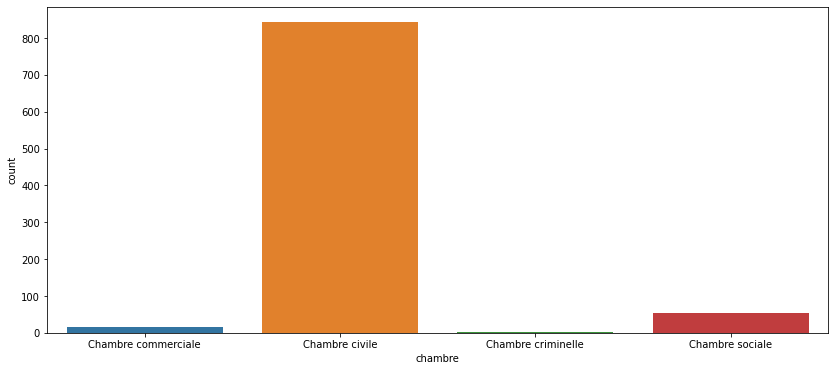

In [ ]:
plt.figure(figsize=[14,6])
sns.countplot(x='chambre', data=df)

### Evolution du taux de cassation en general

<AxesSubplot:xlabel='date'>

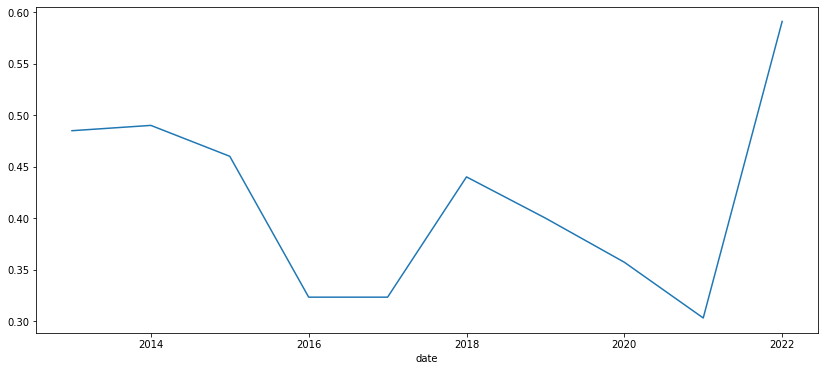

In [ ]:
plt.figure(figsize=[14,6])
df.groupby(df['date'].dt.year)['cassation'].mean().plot()

### Evolution du taux de cassation en fonction de chambre

<AxesSubplot:xlabel='date', ylabel='cassation'>

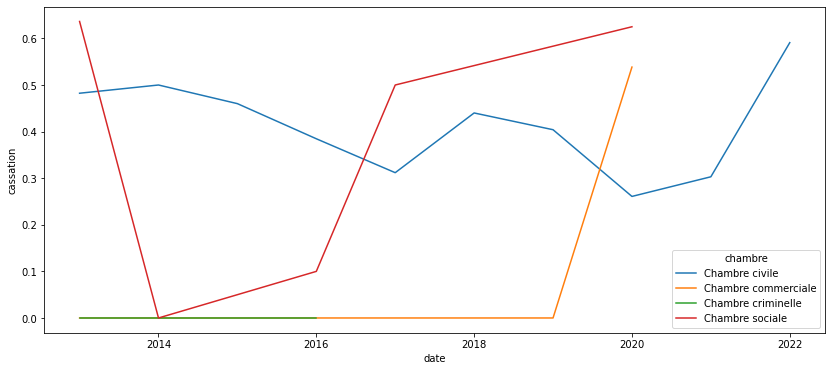

In [ ]:
plt.figure(figsize=[14,6])
x = df.groupby([df['date'].dt.year, 'chambre']).mean()
sns.lineplot(data=x, x='date', y='cassation', hue='chambre')

### Les codes appliques dans les cassations

<AxesSubplot:xlabel='code', ylabel='frequence'>

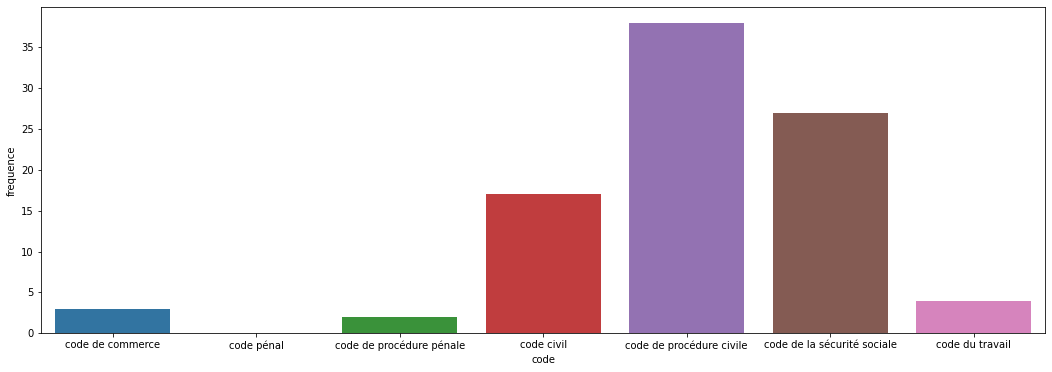

In [ ]:
plt.figure(figsize=[18,6])
sns.barplot(x='code', y='frequence', data=df_codes)